In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

news_data = pd.read_csv('./OnlineNewsPopularity.csv')
news_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [34]:
news_data.shape

(39644, 61)

In [35]:
print("\nFirst artcile in database")
print(news_data.iloc[0,:])


First artcile in database
url                              http://mashable.com/2013/01/07/amazon-instant-...
 timedelta                                                                     731
 n_tokens_title                                                                 12
 n_tokens_content                                                              219
 n_unique_tokens                                                          0.663594
                                                       ...                        
 title_subjectivity                                                            0.5
 title_sentiment_polarity                                                  -0.1875
 abs_title_subjectivity                                                          0
 abs_title_sentiment_polarity                                               0.1875
 shares                                                                        593
Name: 0, Length: 61, dtype: object


In [36]:
news_data = news_data.drop(['url'], axis=1)

Text(0, 0.5, 'shares')

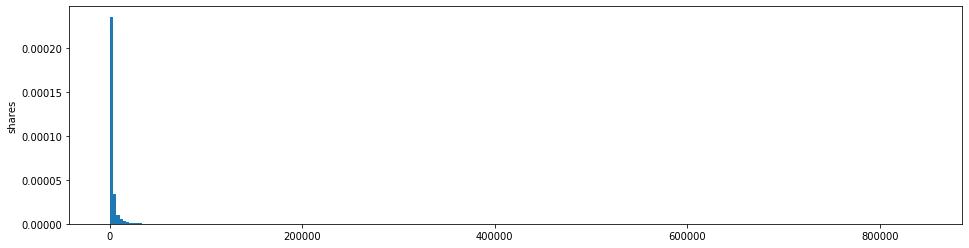

In [37]:
#Wartości odstające - Wykres

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16.0
fig_size[1] = 4.0

x = news_data[' shares']
plt.hist(x, density=True, bins=250)
plt.ylabel('shares')

In [38]:
#Usuwanie wartości odstających
Q1 = news_data[' shares'].quantile(0.25)
Q3 = news_data[' shares'].quantile(0.75)
IQR = Q3 - Q1
LTV= Q1 - (1.5 * IQR)
UTV= Q3 + (1.5 * IQR)
fixedData = news_data.drop(news_data[news_data[' shares'] > UTV].index)
fixedData.shape

(35103, 60)

In [39]:
print(f'Dane przed usunięciem wartości odstających = {news_data.shape}')
print(f'Dane po usunięciu wartości odstających = {fixedData.shape}')
print(f'Liczba wartości odstających = {news_data.shape[0] - fixedData.shape[0]}')

Dane przed usunięciem wartości odstających = (39644, 60)
Dane po usunięciu wartości odstających = (35103, 60)
Liczba wartości odstających = 4541


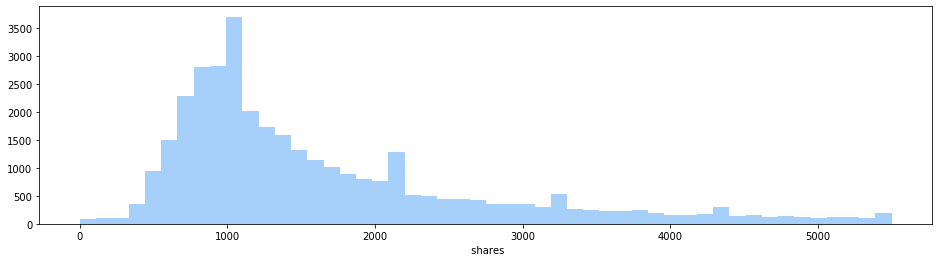

In [40]:
plt.subplots(figsize=(16,4))
sns.distplot(fixedData[' shares'], hist=True, kde=False, color='#2289F0')

In [41]:
#USTALENIE DANYCH WEJŚCIOWYCH I TARGETU
data = fixedData.iloc[1:,1:-1]
target = fixedData.iloc[1:,-1]
data.head()


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286


In [42]:
# STANDARYZACJA DANYCH
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[0.38888889, 0.03284389, 0.6047431 , ..., 0.5       , 1.        ,
        0.        ],
       [0.38888889, 0.02717671, 0.57512955, ..., 0.5       , 1.        ,
        0.        ],
       [0.38888889, 0.06839258, 0.5037879 , ..., 0.5       , 1.        ,
        0.        ],
       ...,
       [0.44444444, 0.05692942, 0.51635516, ..., 0.56818182, 0.09090909,
        0.13636364],
       [0.22222222, 0.08784132, 0.53949331, ..., 0.5       , 1.        ,
        0.        ],
       [0.44444444, 0.02022154, 0.70198678, ..., 0.625     , 0.33333333,
        0.25      ]])

In [43]:
#------------------------------------------------------------------------------------
# Regresja liniowa z usuniętymi wartościami odstającymi z zastosowaniem SVD redukcji wymiarowości
from sklearn.decomposition import PCA

pca = PCA(n_components=40) #Metoda PCA
pca_data = pca.fit(data).transform(data)
pca_data

array([[-0.3555699 ,  0.00866528,  1.23732807, ...,  0.00342305,
         0.01260055,  0.01503904],
       [-0.41505111,  0.34104306,  0.74493274, ..., -0.00501035,
        -0.0094847 ,  0.01465764],
       [ 0.03223653, -0.39460297, -0.28554368, ...,  0.01140349,
        -0.01669401, -0.00609484],
       ...,
       [-0.227935  , -0.34363471, -0.17989547, ...,  0.00802174,
         0.00784164,  0.01420244],
       [ 1.26219197,  0.09502245,  0.18772458, ..., -0.00180843,
         0.00843977,  0.01342378],
       [-0.45036292, -0.71759545, -0.38607578, ...,  0.07241938,
         0.02678224, -0.04323739]])

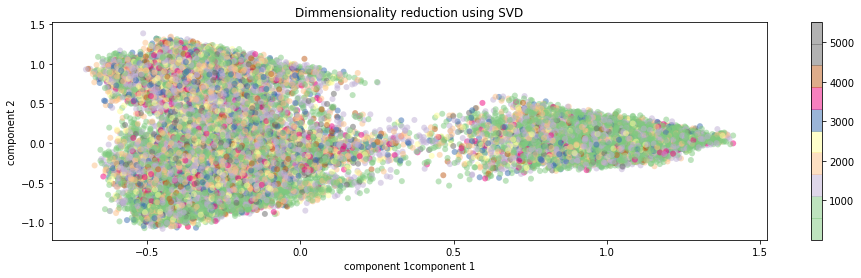

In [44]:
#Wizualizacja na wykresie
plt.scatter(pca_data[:, 0], pca_data[:, 1],
            c=target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1component 1')
plt.ylabel('component 2')
plt.title('Dimmensionality reduction using SVD')
plt.colorbar();

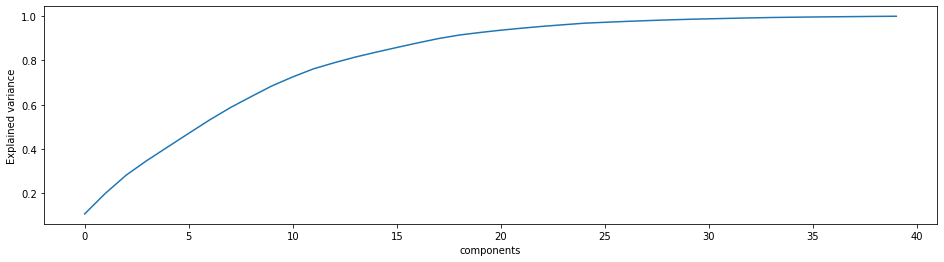

In [45]:
#Explained Variance -> SVD for Online news popularity
pca = PCA().fit(pca_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('Explained variance');

In [46]:
#DZIELENIE DANYCH NA MODELE UCZĄCE I TESTOWE

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(pca_data, target, test_size = 0.10)
print("Training dataset:")
print("data_train:", data_train.shape)
print("target_train:", target_train.shape)
print("\nTesting dataset:")
print("data_test:", data_test.shape)
print("target_test:", target_test.shape)

Training dataset:
data_train: (31591, 40)
target_train: (31591,)

Testing dataset:
data_test: (3511, 40)
target_test: (3511,)


In [47]:
#UCZENIE MODELU
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#PRZEWIDYWANIE
prediction_linear = linear_regression.predict(data_test)

In [49]:
df_someXdata = pd.DataFrame(linear_regression.predict(data_train),list(target_train) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head(10)

,Actual shares,Predicted shares
0,466,1498.580885
1,1100,1294.778547
2,659,1716.875293
3,927,1807.571933
4,2500,2621.215864
5,735,1784.359111
6,921,1959.271025
7,949,1800.630502
8,4600,1972.060209
9,3700,1481.478535


Wykres predykcji


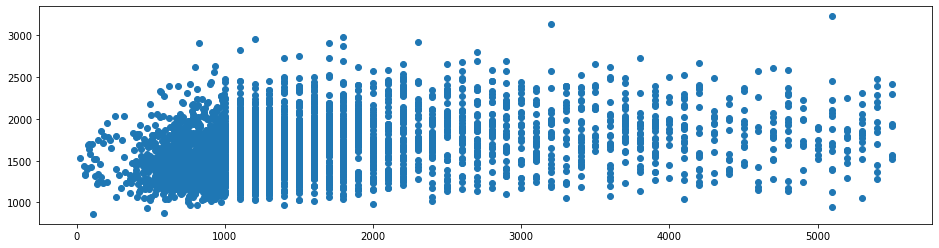

In [50]:
#WYKRES PREDYKCJI
plt.scatter(target_test, prediction_linear)
print("Wykres predykcji")


In [51]:
#Ocena jakości metodą średniego błędu kwadratowego
from sklearn.metrics import mean_squared_error
mse =  mean_squared_error(target_test, prediction_linear)
rmse = np.sqrt(mse)
print("Średni błąd kwadratu wyuczonego modelu: %.2f" %  mse)
print("Pierwiastek średniego błędu kwadratowego: %.2f" %  rmse)

Średni błąd kwadratu wyuczonego modelu: 1078854.93
Pierwiastek średniego błędu kwadratowego: 1038.68


In [52]:
from sklearn.metrics import r2_score #Do usunięcia
print('Variance score: %.2f' % r2_score(target_test, linear_regression.predict(data_test)))

#Wniosek -> Wynik gorszy niż w przypadku czystej regresji
# Najczęściej jest gorszy niż wynik czystej regresji

Variance score: 0.09


In [54]:
# Redukcja wymiarowości metodą SVD Truncated
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=40)
svd_data = svd.fit(data).transform(data)
svd_data

array([[ 2.62380645e+00, -3.59791695e-01,  1.80595976e-02, ...,
        -3.45782596e-02,  9.76171699e-03,  3.36547341e-02],
       [ 2.64174482e+00, -4.09553008e-01,  3.46061020e-01, ...,
        -5.09107745e-02,  3.46355215e-02,  3.92974925e-02],
       [ 2.52533696e+00,  1.56369873e-02, -3.75860086e-01, ...,
        -3.52499749e-02,  4.26108337e-02,  1.47365666e-02],
       ...,
       [ 2.64297466e+00, -2.43103717e-01, -3.17757782e-01, ...,
         1.92722098e-03, -2.95924072e-03,  1.72853050e-02],
       [ 2.79065900e+00,  1.26401592e+00,  6.93369283e-02, ...,
        -2.88794206e-03, -7.21435960e-03,  1.49900220e-02],
       [ 2.93083338e+00, -4.60547368e-01, -7.12926682e-01, ...,
         7.90801737e-02, -2.07257920e-02, -4.40636724e-02]])

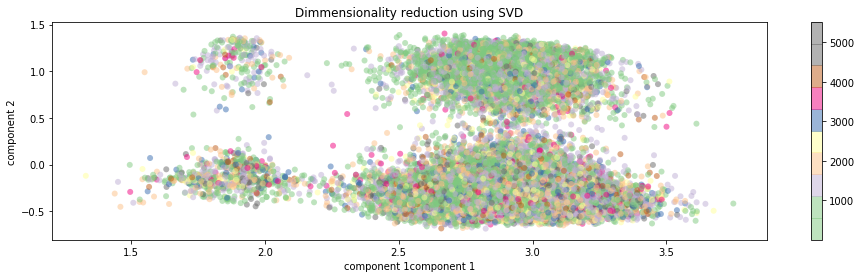

In [55]:
#Wizualizacja na wykresie
plt.scatter(svd_data[:, 0], svd_data[:, 1],
            c=target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1component 1')
plt.ylabel('component 2')
plt.title('Dimmensionality reduction using SVD')
plt.colorbar();

In [56]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(svd_data, target, test_size = 0.10)
print("Training dataset:")
print("data_train:", data_train.shape)
print("target_train:", target_train.shape)
print("\nTesting dataset:")
print("data_test:", data_test.shape)
print("target_test:", target_test.shape)

Training dataset:
data_train: (31591, 40)
target_train: (31591,)

Testing dataset:
data_test: (3511, 40)
target_test: (3511,)


In [57]:
#UCZENIE MODELU
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
#PRZEWIDYWANIE
prediction_linear = linear_regression.predict(data_test)

In [59]:
df_someXdata = pd.DataFrame(linear_regression.predict(data_train),list(target_train) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head(10)

,Actual shares,Predicted shares
0,2100,1958.315200
1,1800,2171.451664
2,1100,1514.177630
3,706,1719.960665
4,728,1360.230910
5,1200,1904.209627
6,961,1728.527810
7,3700,2448.295570
8,4300,1658.732868
9,712,2068.583207


Wykres predykcji


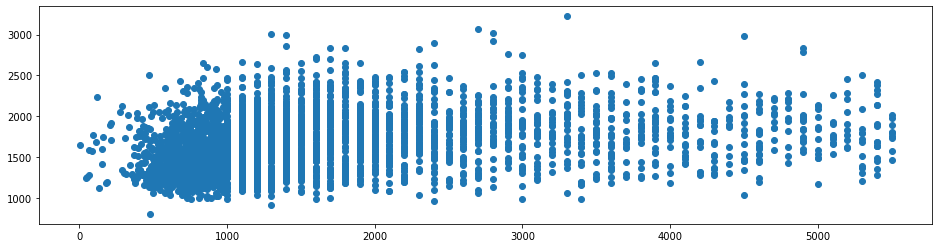

In [60]:
#WYKRES PREDYKCJI
plt.scatter(target_test, prediction_linear)
print("Wykres predykcji")


In [61]:
#Ocena jakości metodą średniego błędu kwadratowego
from sklearn.metrics import mean_squared_error
mse =  mean_squared_error(target_test, prediction_linear)
rmse = np.sqrt(mse)
print("Średni błąd kwadratu wyuczonego modelu: %.2f" %  mse)
print("Pierwiastek średniego błędu kwadratowego: %.2f" %  rmse)

Średni błąd kwadratu wyuczonego modelu: 1154251.68
Pierwiastek średniego błędu kwadratowego: 1074.36


In [62]:
from sklearn.metrics import r2_score #Do usunięcia
print('Variance score: %.2f' % r2_score(target_test, linear_regression.predict(data_test)))

#Wniosek -> Wynik gorszy niż w przypadku czystej regresji

Variance score: 0.08
